#  **Data** **Visualization** **and** **Pre**-**processing**

1. **Download** **the** **dataset**: **Dataset** 
2. **Load** **the** **dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('Admission_Predict.csv')

3.**Perform** **Below** **Visualizations**

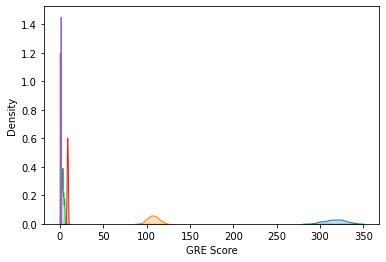

In [5]:
sns.kdeplot(data['GRE Score'], shade=True)
sns.kdeplot(data['TOEFL Score'], shade=True)
sns.kdeplot(data['University Rating'], shade=True)
sns.kdeplot(data['CGPA'], shade=True)
sns.kdeplot(data['Research'], shade=True)

In [6]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
for column in ['GRE Score','TOEFL Score','University Rating','CGPA','Research']:
    data[column] = stand.fit_transform(data[column].values.reshape(-1,1))

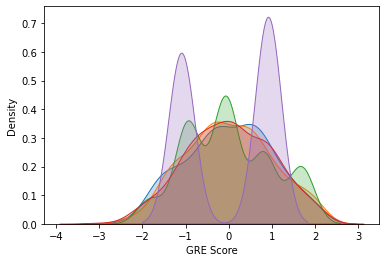

In [7]:
sns.kdeplot(data['GRE Score'], shade=True)
sns.kdeplot(data['TOEFL Score'], shade=True)
sns.kdeplot(data['University Rating'], shade=True)
sns.kdeplot(data['CGPA'], shade=True)
sns.kdeplot(data['Research'], shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


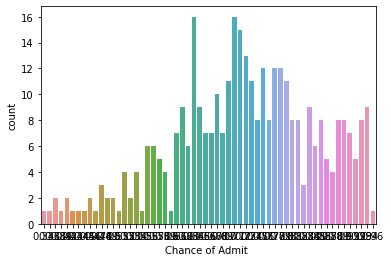

In [20]:
sns.countplot(data['Chance of Admit '])

4. **Perform** **descriptive** **statistics** **on** **the** **dataset**

In [11]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,4.000000e+02,4.000000e+02,400.000000
mean,200.500000,-4.174439e-16,5.595524e-16,7.105427e-17,3.400000,3.452500,7.771561e-16,-3.996803e-17,0.724350
std,115.614301,1.001252e+00,1.001252e+00,1.001252e+00,1.006869,0.898478,1.001252e+00,1.001252e+00,0.142609
min,1.000000,-2.339367e+00,-2.542098e+00,-1.827457e+00,1.000000,1.000000,-3.020504e+00,-1.099975e+00,0.340000
25%,100.750000,-7.685900e-01,-7.274920e-01,-9.520286e-01,2.500000,3.000000,-7.201909e-01,-1.099975e+00,0.640000
50%,200.500000,1.679859e-02,-6.763531e-02,-7.660001e-02,3.500000,3.500000,1.859559e-02,9.091117e-01,0.730000
75%,300.250000,7.149218e-01,7.571856e-01,7.988286e-01,4.000000,4.000000,7.783704e-01,9.091117e-01,0.830000
max,400.000000,2.023903e+00,2.076899e+00,1.674257e+00,5.000000,5.000000,2.218165e+00,9.091117e-01,0.970000


5 .**Handle the Missing values**

In [12]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

 6.**Find** **the** **outliers** **and** **replace** **the** **outliers**

In [13]:
lowerlimit=data['CGPA'].quantile(0.05)
lowerlimit
data[data['CGPA']<lowerlimit]
upperlimit=data['CGPA'].quantile(0.95)
upperlimit
data[data['CGPA']<upperlimit]
data=data[(data['CGPA']>lowerlimit)&(data['CGPA']<upperlimit)]
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,0.627656,-0.067635,0.798829,4.0,4.5,0.455151,0.909112,0.76
2,3,-0.070467,-0.562528,-0.076600,3.0,3.5,-1.005631,0.909112,0.72
3,4,0.453126,0.427257,-0.076600,3.5,2.5,0.119339,0.909112,0.80
4,5,-0.244998,-0.727492,-0.952029,2.0,3.0,-0.653029,-1.099975,0.65
5,6,1.151249,1.252078,1.674257,4.5,3.0,1.244310,0.909112,0.90
...,...,...,...,...,...,...,...,...,...
394,395,1.063983,0.592221,0.798829,4.5,4.0,1.059613,0.909112,0.89
395,396,0.627656,0.427257,-0.076600,3.5,3.5,0.740592,0.909112,0.82
396,397,0.714922,-0.067635,-0.076600,3.0,3.5,0.858126,0.909112,0.84
397,398,1.151249,1.417042,0.798829,5.0,4.5,1.429006,0.909112,0.91


 7.**Check** **for** **Categorical** **columns** **and** **perform** **encoding**

In [14]:
data = pd.get_dummies(data)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,0.627656,-0.067635,0.798829,4.0,4.5,0.455151,0.909112,0.76
2,3,-0.070467,-0.562528,-0.076600,3.0,3.5,-1.005631,0.909112,0.72
3,4,0.453126,0.427257,-0.076600,3.5,2.5,0.119339,0.909112,0.80
4,5,-0.244998,-0.727492,-0.952029,2.0,3.0,-0.653029,-1.099975,0.65
5,6,1.151249,1.252078,1.674257,4.5,3.0,1.244310,0.909112,0.90


8.**Split** **the** **data** **into** **dependent** **and** **independent** **variables**

In [15]:
x = data.iloc[:,0:8]
y = data.iloc[:,8]

print(x.shape)
print(y.shape)

(358, 8)
(358,)


9.**Scale** **the** **independent** **variables** 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7
0,-0.436882,0.904415,0.097988,-0.109072,-0.483997,0.039084,0.587059,-1.180194
1,0.662256,-0.603568,-1.027473,-0.109072,1.144177,0.655238,0.056822,0.847319
2,-1.064961,0.301222,0.473142,1.776815,1.686902,1.271392,1.286970,0.847319
3,-0.358372,-0.000375,-0.464743,-0.109072,0.058728,-0.577069,-0.112853,-1.180194
4,-1.666870,-1.005697,0.285565,-0.109072,0.601452,-0.577069,-1.300582,0.847319


 10.**Split** **the** **data** **into** **training** **and** **testing**

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
print(' x_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' x_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 x_train.shape :  (268, 8)
 y_train.shape :  (268,)
 x_test.shape :  (90, 8)
 y_test.shape :  (90,)
